Performing EDA on QUANTIUM dataset

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [42]:
dataset = pd.read_csv('QVI_purchase_behaviour.csv')

In [11]:
dataset.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [12]:
dataset.shape

(72637, 3)

In [14]:
dataset.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
dataset.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [17]:
dataset['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [18]:
dataset['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

### Checking for duplicate values

In [19]:
dataset.duplicated().sum()

0

### Checking for missing values

In [20]:
dataset.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

### Preforming graphical analysis

<AxesSubplot:>

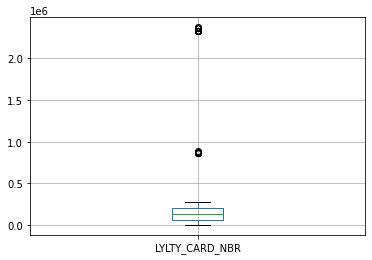

In [ ]:
dataset.boxplot()

In [ ]:
sea.boxplot(x='TOT_SALES', data= tran_df)

<AxesSubplot:xlabel='LIFESTAGE', ylabel='count'>

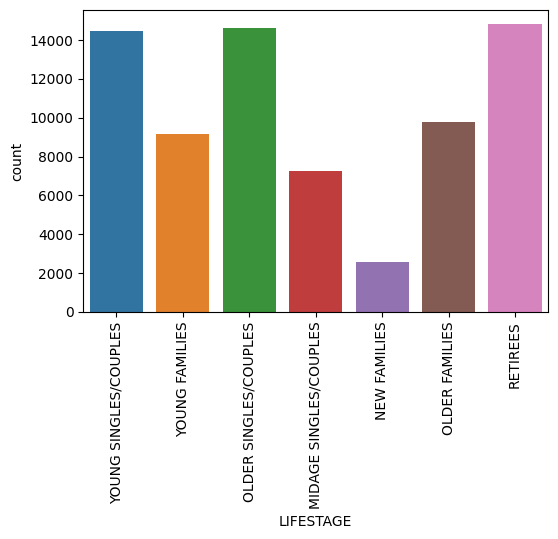

In [43]:
plt.figure(dpi = 100)
plt.xticks(rotation = 90)
sea.countplot(x = 'LIFESTAGE', data = dataset)

<AxesSubplot:xlabel='PREMIUM_CUSTOMER', ylabel='count'>

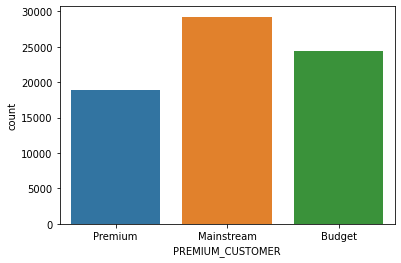

In [46]:
sea.countplot(x = 'PREMIUM_CUSTOMER', data = dataset)

### SECOND DATASET

In [4]:
tran_df = pd.read_excel('QVI_transaction_data.xlsx')

In [32]:
tran_df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [35]:
tran_df.tail(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [36]:
# Dates
import datetime
from matplotlib.dates import DateFormatter


In [38]:
# Date is not in the right format

# Function that converts Excel integer into yyyy-mm-dd format
def xldate_to_date(properdate):
    excel_anchor = datetime.datetime(1900, 1, 1)
    if(properdate < 60):
        delta_in_days = datetime.timedelta(days = (properdate - 1))
    else:
        delta_in_days = datetime.timedelta(days = (properdate - 2))
    converted_date = excel_anchor + delta_in_days
    return converted_date
    

In [39]:
tran_df['DATE'] = tran_df['DATE'].apply(xldate_to_date)

In [41]:
tran_df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Summarize dataset:  58%|█████▊    | 11/19 [00:01<00:01,  7.73it/s, Calculate kendall correlation]  /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4868: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 67.71it/s]


In [56]:
tran_df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [57]:
tran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [58]:
tran_df.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

In [21]:
tran_df.duplicated().sum()

1

In [30]:
tran_df.drop_duplicates(inplace=True)

In [31]:
tran_df.duplicated().sum()

0

In [26]:
tran_df['TXN_ID'].duplicated().sum()

1709

<AxesSubplot:xlabel='STORE_NBR', ylabel='count'>

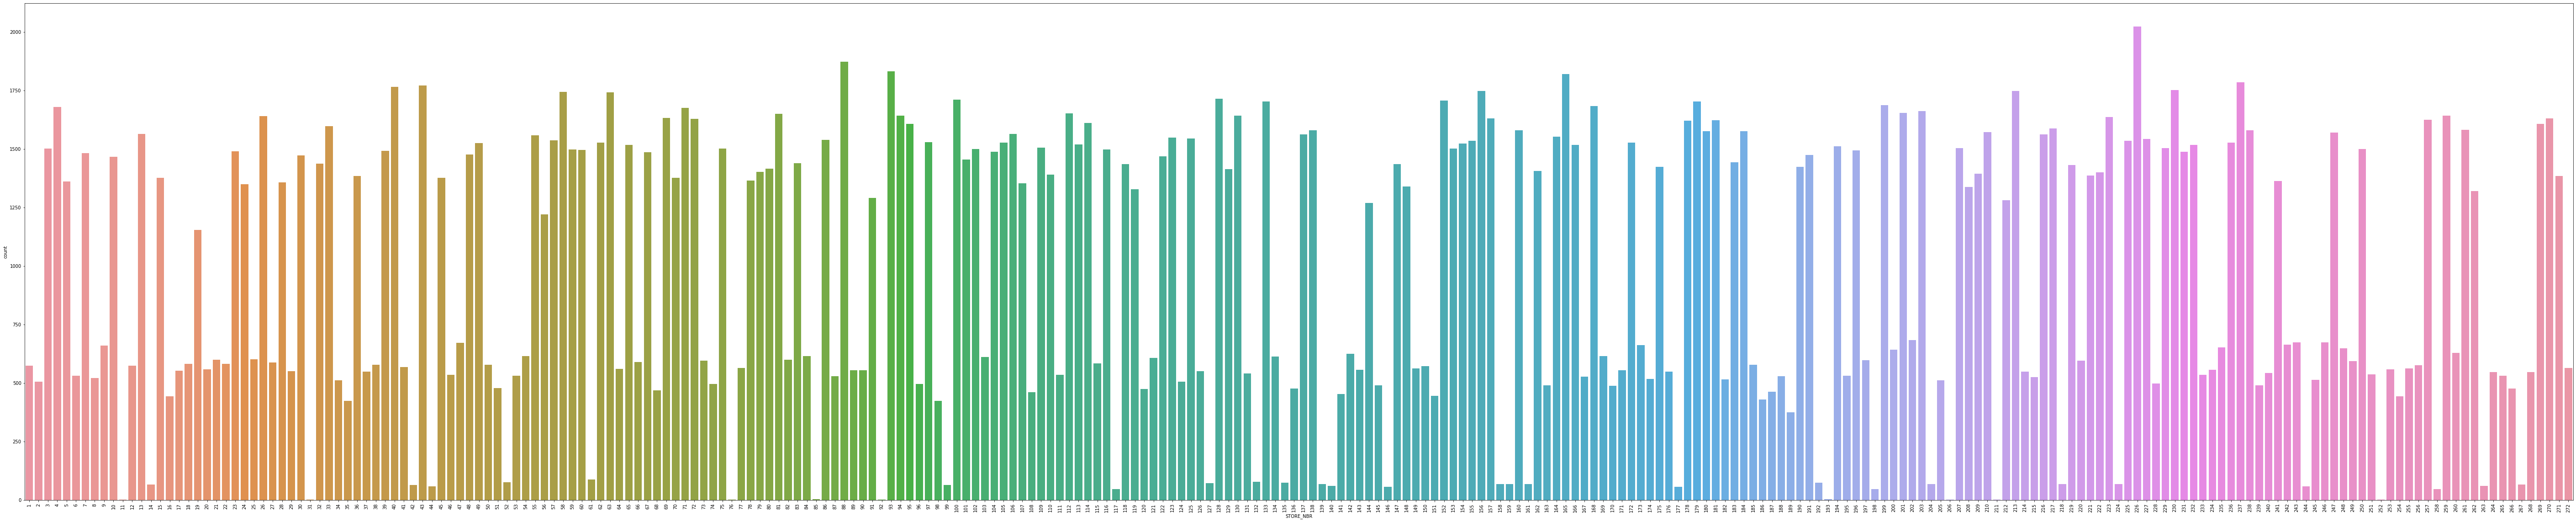

In [9]:
plt.figure(figsize=(100,20))
plt.xticks(rotation = 90)
# sea.set_theme(style="white")
sea.countplot(x='STORE_NBR' ,data= tran_df)

In [15]:
# fig, ax = plt.subplots(figsize=(16,8))
# ax.lineplot(tran_df['STORE_NBR'], tran_df['TOT_SALES'])
# ax.set_xlabel('STORE NUMBER')
# ax.set_ylabel('TOTAL Sales')
# plt.show()

In [18]:
# plt.figure(figsize=(25,6))
# plt.xticks(rotation = 90)
# # sea.set_theme(style="white")
# sea.boxplot(y='PROD_NAME' ,data= tran_df)

<AxesSubplot:xlabel='PROD_NAME', ylabel='count'>

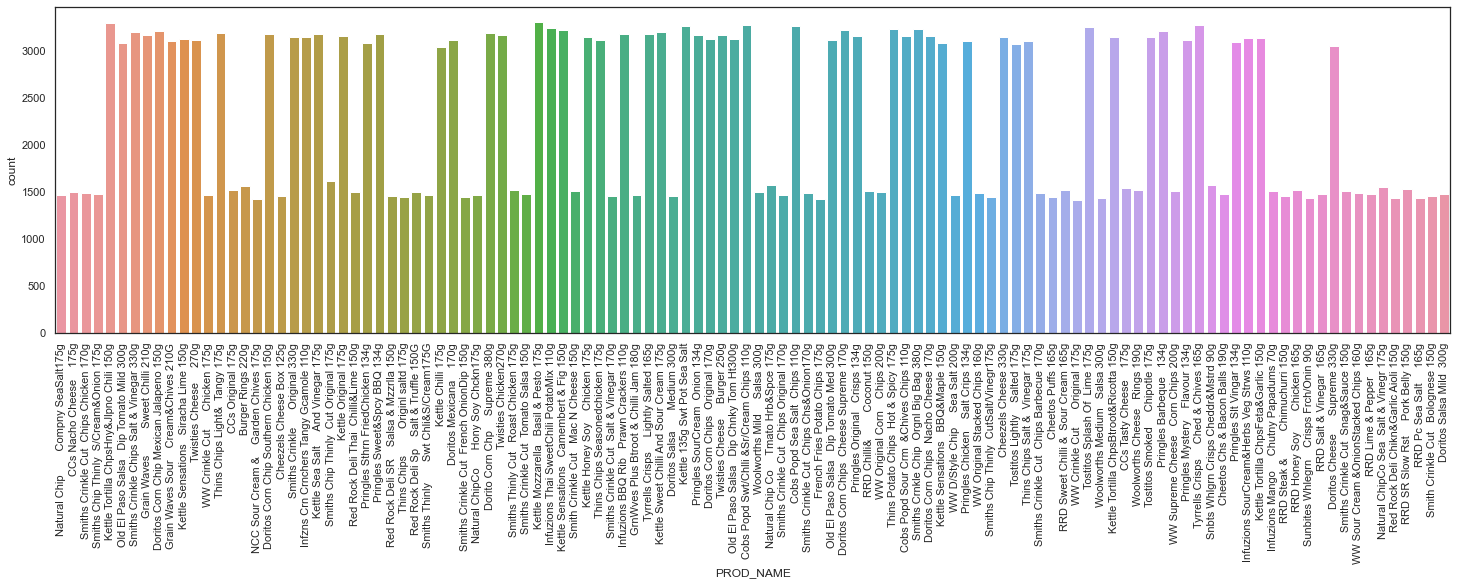

In [41]:
plt.figure(figsize=(25,6))
plt.xticks(rotation = 90)
# sea.set_theme(style="white")
sea.countplot(x='PROD_NAME' ,data= tran_df)

<AxesSubplot:xlabel='PROD_QTY', ylabel='count'>

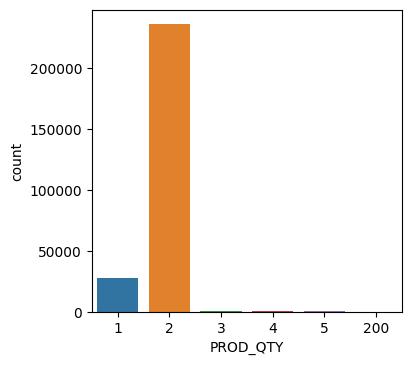

In [10]:
plt.figure(figsize=(4,4), dpi =100)
sea.countplot(x='PROD_QTY', data= tran_df)

<AxesSubplot:xlabel='TOT_SALES', ylabel='count'>

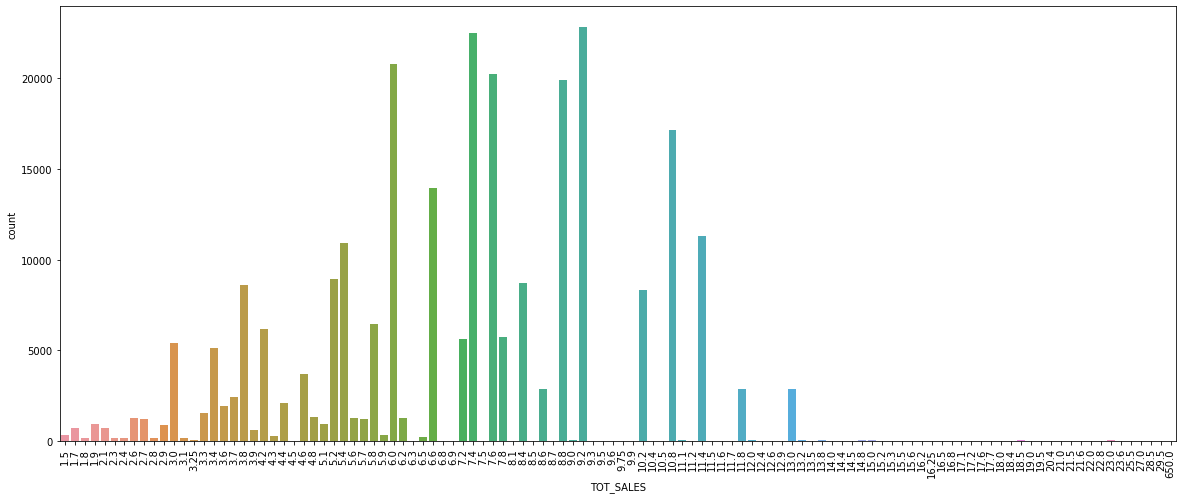

In [32]:
plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)
sea.countplot(x='TOT_SALES', data= tran_df)

In [70]:
tran_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264835.000000,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835.000000,264835.000000
mean,43464.036600,135.080216,1.355496e+05,1.351584e+05,56.583201,1.907308,7.304205
std,105.389336,76.784306,8.058011e+04,7.813316e+04,32.826692,0.643655,3.083231
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760100e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303580e+05,1.351380e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030945e+05,2.027015e+05,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [10]:
q1 = tran_df.STORE_NBR.quantile(0.25)
q3 = tran_df.STORE_NBR.quantile(0.75)
q1, q3

(70.0, 203.0)

In [11]:
IQR = q3 - q1
IQR

133.0

In [12]:
lower_lmt = q1 - 1.5*IQR
upper_lmt = q3 + 1.5*IQR
lower_lmt,upper_lmt

(-129.5, 402.5)

In [71]:
tran_df.duplicated().sum()

0

In [60]:
tran_df.drop_duplicates(inplace = True)

In [62]:
tran_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [6]:
tran_df['TXN_ID'].

0       1
1     348
2     383
3     974
4    1038
5    2982
6    3333
7    3539
8    4525
9    6900
Name: TXN_ID, dtype: int64

<AxesSubplot:xlabel='STORE_NBR', ylabel='LYLTY_CARD_NBR'>

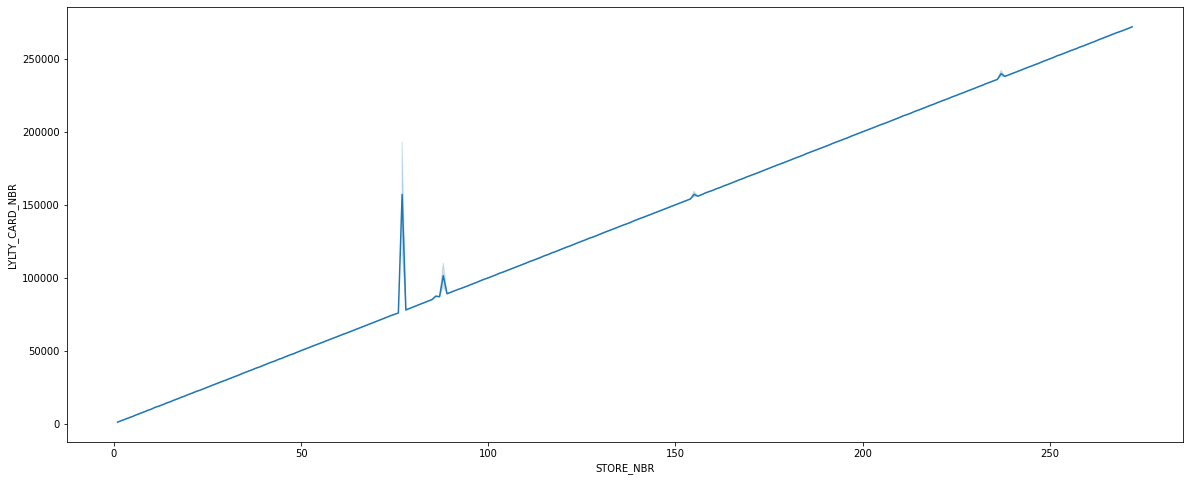

In [20]:
plt.figure( figsize= (20,8))
sea.lineplot(x = 'STORE_NBR', y = 'LYLTY_CARD_NBR' ,data = tran_df)

AttributeError: 'PathCollection' object has no property 'bin'

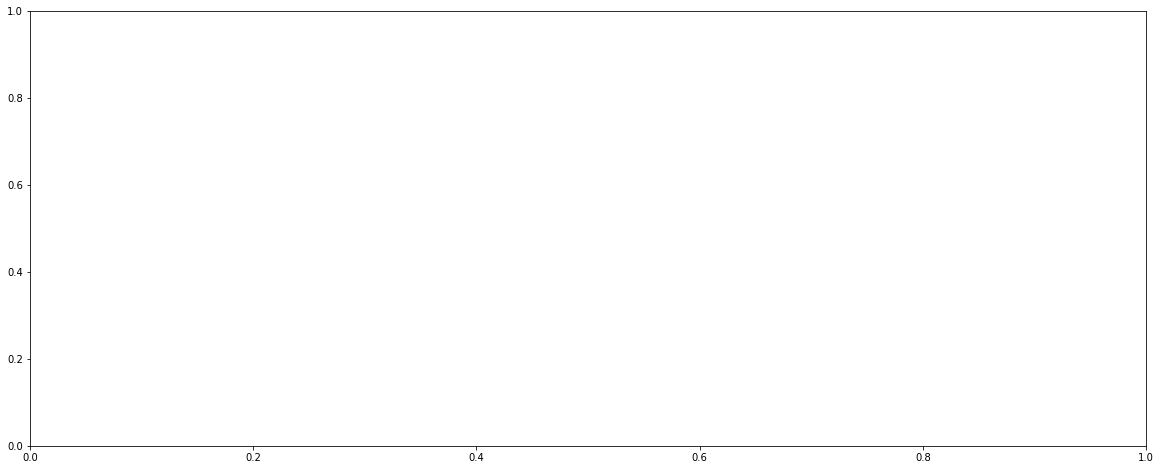

In [26]:
plt.figure( figsize= (20,8))
sea.scatterplot(x = 'STORE_NBR', y = 'LYLTY_CARD_NBR' ,data = tran_df)

<AxesSubplot:xlabel='STORE_NBR', ylabel='TXN_ID'>

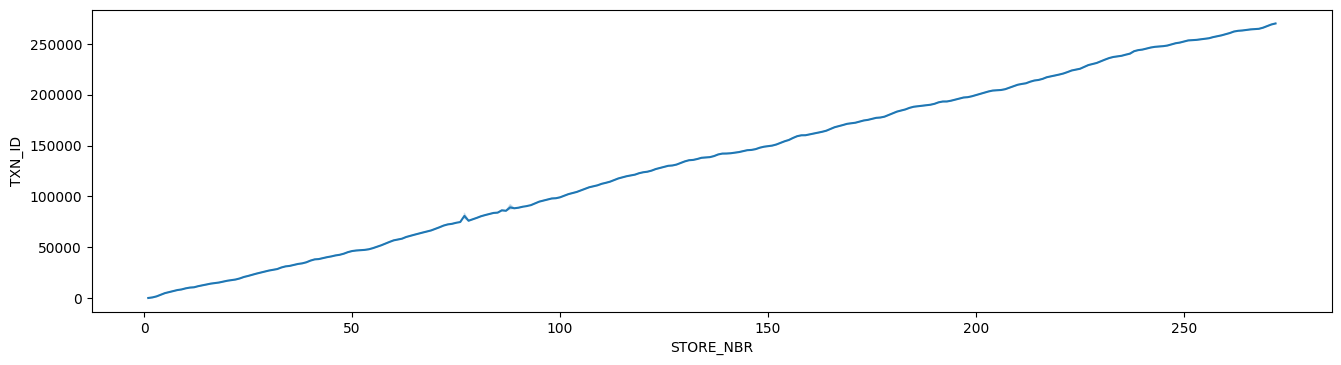

In [24]:
plt.figure( figsize= (16,4), dpi = 100)
sea.lineplot(x = 'STORE_NBR', y = 'TXN_ID' ,data = tran_df)

<Figure size 800x800 with 0 Axes>

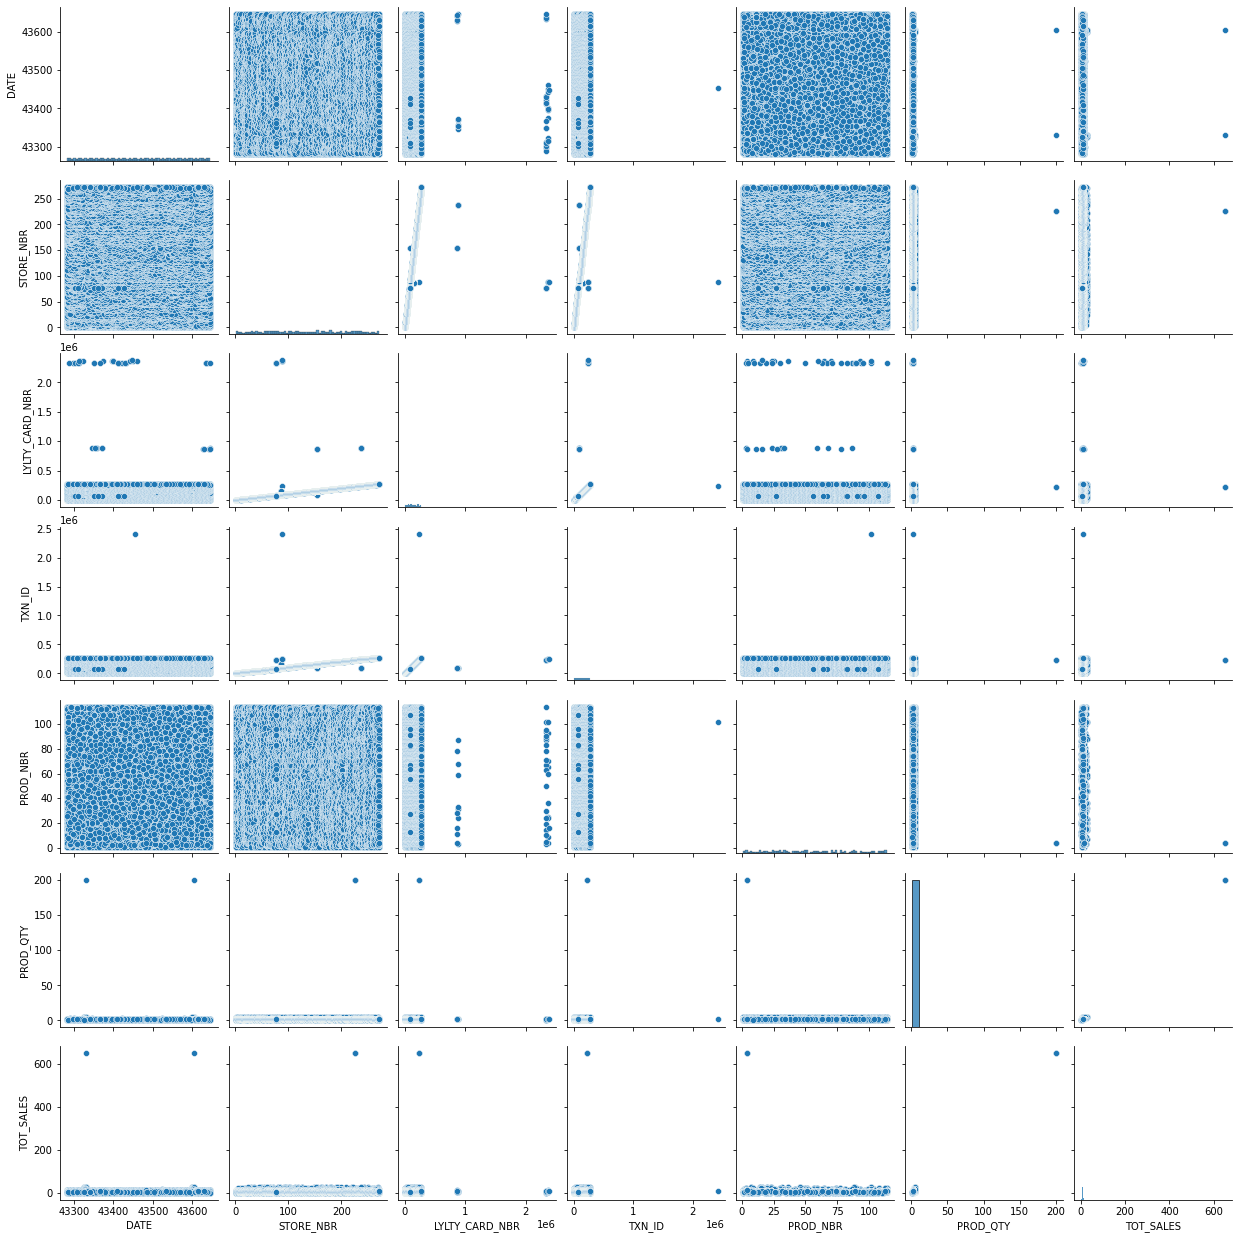

In [97]:
plt.figure( figsize= (8,8) , dpi = 100)
sea.pairplot(tran_df)

In [23]:
plt.figure( figsize=(8,8), dpi = 100)
sea.barplot(x = 'LYLTY_CARD_NBR', y='PROD_NBR', data= tran_df , stat='density')

KeyboardInterrupt: 

<Figure size 800x800 with 0 Axes>

In [27]:
plt.figure( figsize= (8,8), dpi = 100)
sea.pairplot( kind = 'reg', data = tran_df)

In [ ]:
plt.figure( figsize= (8,8), dpi = 100)
sea.pairplot( kind = 'scatter', data = tran_df)

<Figure size 800x800 with 0 Axes>

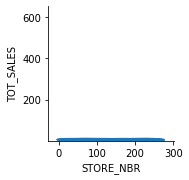

In [4]:
plt.figure( figsize= (8,8), dpi = 100)
sea.pairplot(kind= 'kde',x_vars='STORE_NBR',y_vars='TOT_SALES' ,data= tran_df)

<Figure size 800x800 with 0 Axes>

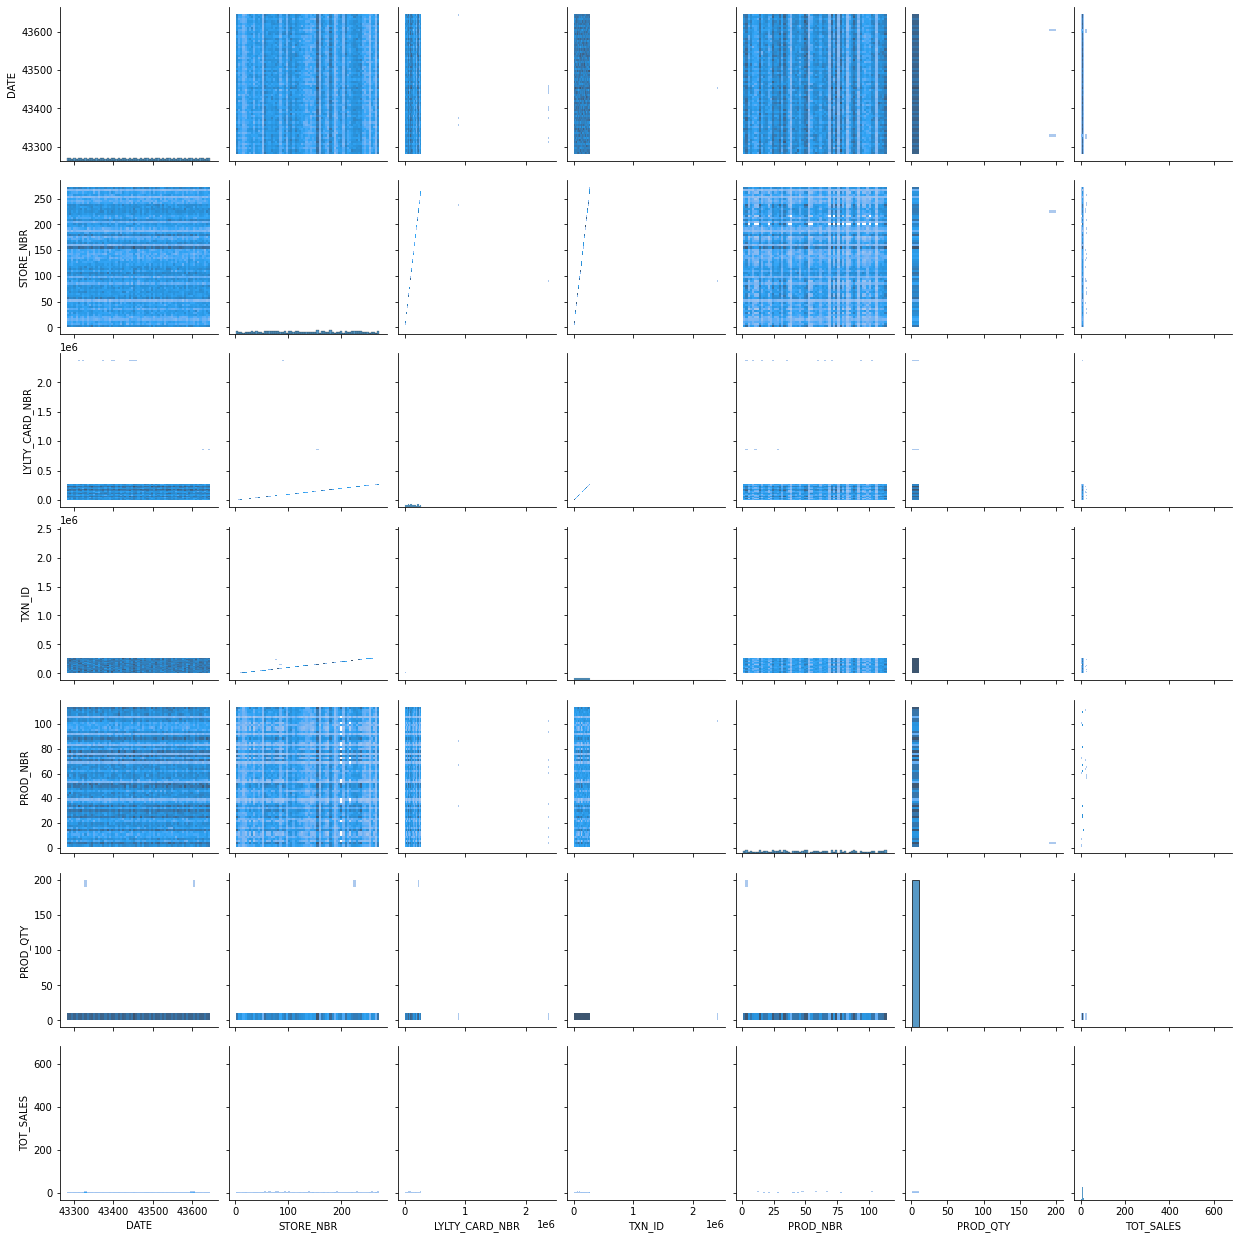

In [25]:
plt.figure( figsize= (8,8), dpi = 100)
sea.pairplot(kind= 'hist', data= tran_df)